Importando bibliotecas

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib


Carregando dataset


In [2]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')
titanic = pd.read_csv('datasets/gender_submission.csv')
df_resposta = pd.DataFrame()
data_df = pd.concat([train_df.drop(['Cabin'], axis=1), test_df])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [3]:
data_df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


### Verificar se os dados de teste estão nos dados de treinamento


In [4]:
print(set(test_df.columns).issubset(set(train_df.columns)))

True


Conhecendo algums informações sobre o dataset

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          91 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Com este comando conseguimos visualizar quais são as colunas disponiveis, [PassegerID (Identificação do passageiro), Survived (sobreviveu), Pclass (classe do passageiro), Name (Nome), Sex (Sexo), Age (Idade), SibSp (conjuge no navio), Parch (filhos no navio), Ticket (passagem), Fare (tarifa), Cabin (Cabine), Embarked (embarque)] e a memória utilizada na leitura/processamento do arquivo: (+ ou - 83.6KB)


##### A função "head" exibe as primeiras 5 linhas do quadro de dados.

#### Vamos explorar as colunas:

##### PassengerId - este é apenas um ID gerado 
##### class - qual classe fez o passeio de passageiro - primeiro, segundo ou terceiro
##### Nome - auto explicativo
##### Sexo - masculino ou feminino
##### SibSp - eram o cônjuge ou irmãos do passageiro com eles no navio
##### Partch - eram os pais ou os filhos do passageiro com eles no navio
##### Bilhete - número do bilhete
##### Tarifa - valor da passagem
##### Cabine
##### Embarcado - porto de embarque
##### Sobreviveu - o passageiro sobreviveu ao naufrágio do Titanic?

In [6]:
data_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,NaN,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,NaN,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [7]:
data_df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


### Analisando os dados acima, acredito que podemos explorar na analise o seguintes campos:
#### Survived (Sobreviveu? 0 - Não / 1 - Sim)
#### Pclass (Classe: 1 - Primeira, 2 - Segunda, 3 - Terceira)
#### Sex (Sexo)
#### Age (Idade)

Conta a quantidade de linhas no dataset

In [8]:
len(data_df)

1309

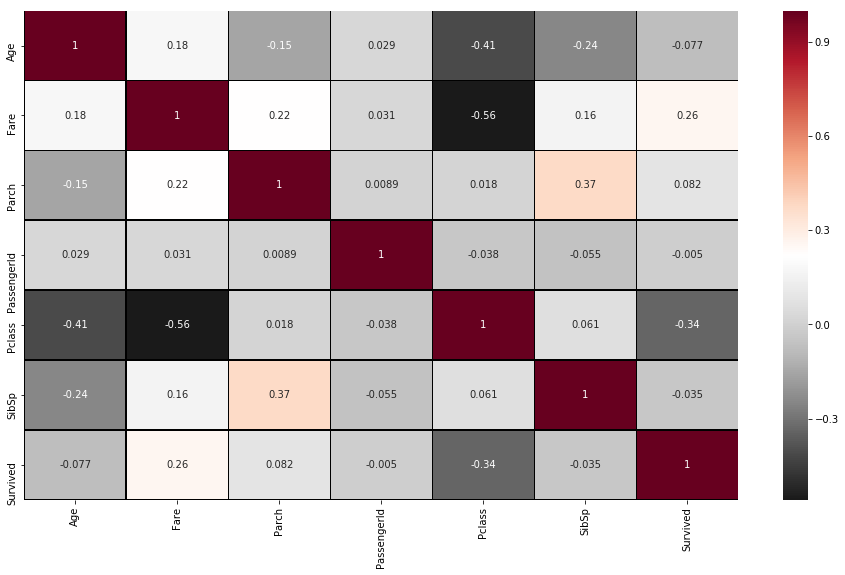

In [9]:
%matplotlib inline

plt.figure(figsize=(16,9))
sns.heatmap(data_df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='RdGy_r')
plt.xticks(rotation=90)
plt.show()

In [10]:
data_df.describe(include = "all")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,91,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,76,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,B57 B59 B63 B66,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,3,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


Verificando a quantidade de linhas vazias para cada coluna

In [11]:
data_df.isnull().sum()

Age             263
Cabin          1218
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### No nosso dataset temos 891 linhas 


Observei que para a idade temos 177 linhas que nao possuem idade
estou supondo que a idade e importante para a sobrevivencia.
Assim vou preencher a idade de forma a nao deixar vazio.
 
Na coluna cabine temos 687 linhas vazias, presumo que seja um dado irrelavante
uma vez que temos a classe do passageiro.




### Obtendo a media de idade para poder preencher as linhas de idade nulas

In [12]:
mode(data_df['Age']).mode[0]

24.0

#### inputando a media de idade para as linhas vazias

In [13]:
data_df['Age'].fillna(mode(data_df['Age']).mode[0], inplace=True)

Preenchendo valores vazio na tarifa



In [14]:
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)

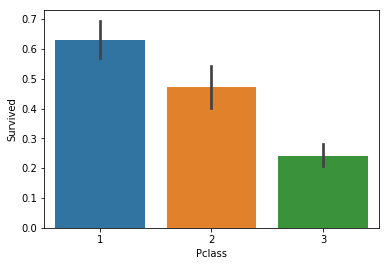

In [15]:
sns.barplot(x="Pclass", y="Survived", data=train_df)

### Vamos deixas as informações mais claras removendo as informações que nao seram uteis nas analises
###### Julgamos que estas variaveis nao serao de grande impacto para nosso modelo
#### Ticket, Cabin e PassegerId



In [16]:
data_df.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)

In [17]:
data_df.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0


In [18]:
#agora precisamos preencher os valores ausentes no recurso Embarcado
print("Number of people embarking in Southampton (S):")
southampton = data_df[data_df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = data_df[data_df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = data_df[data_df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
914
Number of people embarking in Cherbourg (C):
270
Number of people embarking in Queenstown (Q):
123


##### Como a maioria das pessoas embarcaram no portao de Southampton, vamos preencher os nulos como Southampton

In [19]:
data_df = data_df.fillna({"Embarked": "S"})

In [20]:
data_df.isnull().sum()

Age           0
Embarked      0
Fare          0
Name          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
dtype: int64

##### Precisamos que as variaveis Sex e Embarked sejam numericas, assim vamos deixar elas binarias

In [21]:
data_df = pd.get_dummies(data_df, dummy_na=True, columns=['Sex','Embarked'])

In [22]:
display(data_df.head())

,Age,Fare,Name,Parch,Pclass,SibSp,Survived,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,3,1,0.0,0,1,0,0,0,1,0
1,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1.0,1,0,0,1,0,0,0
2,26.0,7.9250,"Heikkinen, Miss. Laina",0,3,0,1.0,1,0,0,0,0,1,0
3,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1.0,1,0,0,0,0,1,0
4,35.0,8.0500,"Allen, Mr. William Henry",0,3,0,0.0,0,1,0,0,0,1,0


#### Removendo Colunas Vazias

In [23]:
data_df.drop(['Sex_nan','Embarked_nan'], axis=1, inplace = True)

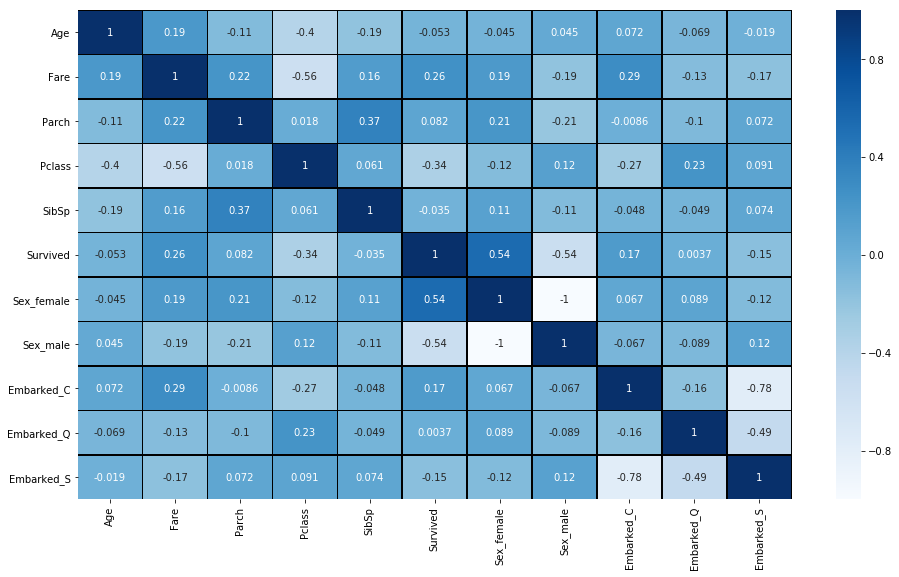

In [25]:
%matplotlib inline

plt.figure(figsize=(16,9))
sns.heatmap(data_df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()

In [24]:
#Agrupando a proporção de sobrevivente por classe e gerando um gráfico a partir do resultado

sobreviventes_classe = data_df.copy()
sobreviventes_classe['Survived'] = data_df['Survived'] == 1

sns.barplot(data=sobreviventes_classe, x="Pclass", y="Survived")

plt.title('Proporção de Sobreviventes por classe')
plt.ylabel('Proporção')
plt.show()

KeyError: 'Survived'

In [25]:
sns.barplot(x="Sex_female", y ="Survived", data=data_df)


ValueError: Could not interpret input 'Survived'

In [26]:
for name_string in data_df['Name']:
    data_df['Title']=data_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)
    
    

#replacing the rare title with more common one.
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)

data_df['Title'].value_counts()

Mr        767
Miss      265
Mrs       200
Master     61
Dr          8
Rev         8
Name: Title, dtype: int64

#### Discretizando a tarifa

In [27]:
data_df["Fare"].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [28]:
def discrete_fare(fare):
    if np.isnan(fare):
        return fare
    elif fare <= 7.8958:
        return 0
    elif fare <= 14.4542:
        return 1
    elif fare <= 31.275:
        return 2
    else:
        return 3

data_df["Discrete Fare"] = data_df.apply(lambda row: discrete_fare(row["Fare"]), axis=1)
data_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title,Discrete Fare
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0,Mrs,3
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1,Miss,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1,Mrs,3
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1,Mr,1


In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age           1309 non-null float64
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
SibSp         1309 non-null int64
Survived      891 non-null float64
Sex_female    1309 non-null uint8
Sex_male      1309 non-null uint8
Embarked_C    1309 non-null uint8
Embarked_Q    1309 non-null uint8
Embarked_S    1309 non-null uint8
Title         1309 non-null object
dtypes: float64(3), int64(3), object(2), uint8(5)
memory usage: 98.4+ KB


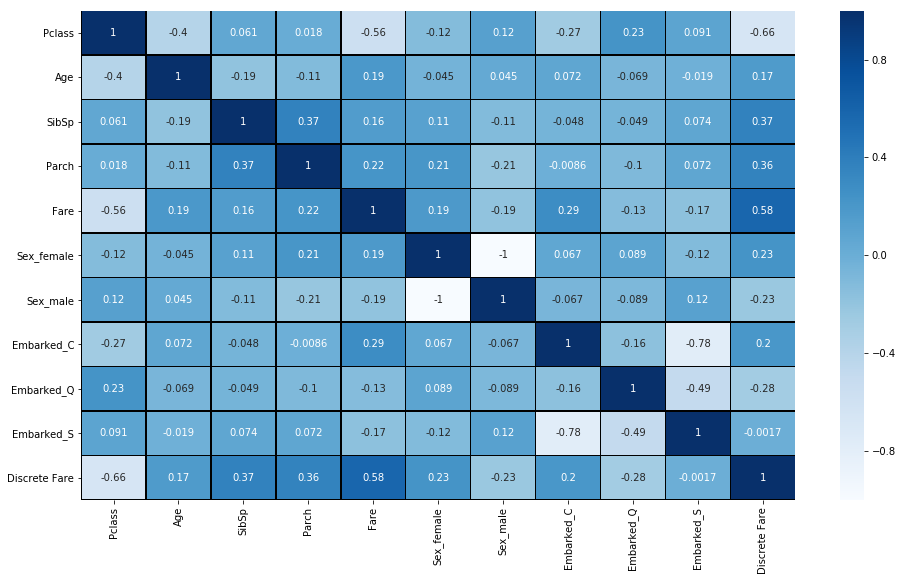

In [30]:
%matplotlib inline

plt.figure(figsize=(16,9))
sns.heatmap(data_df.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()

## Relatório de Análise Exploratória com o pandas_profiling

Vamos visualizar agora algumas informações sobre esse dataset com o pandas_profiling que facilita todo o processo de obter informações sobre o dataset:

In [29]:
pp.ProfileReport(data_df)

Number of variables,14
Number of observations,1309
Total Missing (%),2.3%
Total size in memory,98.5 KiB
Average record size in memory,77.1 B
Numeric,7
Categorical,2
Boolean,5
Date,0
Text (Unique),0
Rejected,0


In [30]:
data_df.head()

,Age,Fare,Name,Parch,Pclass,SibSp,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,3,1,0.0,0,1,0,0,1,Mr
1,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1.0,1,0,1,0,0,Mrs
2,26.0,7.9250,"Heikkinen, Miss. Laina",0,3,0,1.0,1,0,0,0,1,Miss
3,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1.0,1,0,0,0,1,Mrs
4,35.0,8.0500,"Allen, Mr. William Henry",0,3,0,0.0,0,1,0,0,1,Mr


### Separação dos dados de treino e classe


_**Definição da classe:**_ O que queremos descobrir nesse estudo? Se o tripulante do titanic sobreviveu ou nao <br>


In [ ]:
#classe = train_df['Survived']

Separação das variaveis do modelo (features) - Somente os dados numéricos considerados relevantes, no caso as variáveis definidas anteriormente: ['Pclass', 'Age', 'Sex_famale', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [ ]:
# Definição do dataset de treino somente com as informações relevantes para treinar o modelo
#features = ['Pclass','Age','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','SibSp','Fare','Parch']
#x_train = train_df[features]

Vamos selecionar os dados de teste contendo somente as features necessárias a análise:

In [ ]:
#x_test = test_df[features]

In [ ]:
# Criando o objeto RandomForest
#rf = RandomForestRegressor(random_state=42, n_estimators=200).fit(x_train,classe)
#rf

In [ ]:
# Score do classificador usando a métrica R-quadrado (coeficiente de determinação)
#rf.score(x_train,classe)

In [ ]:
#sobreviventes = rf.predict(x_test)

In [ ]:
#df_resposta['Survived'] = np.around(sobreviventes,2)

In [ ]:
# Exemplos de sobreviventes
#df_resposta['Survived'].unique()

In [ ]:
#sobreviventes

In [ ]:
#test_df.head()

In [ ]:
#df_resposta.to_csv('datasets/sobreviu.csv', index=False, header=True)

In [ ]:
# Salvar o modelo preditivo
#joblib.dump(rf, 'rf_regressor.pkl')

# Usar/carregar o modelo preditivo
#rf2 = joblib.load('rf_regressor.pkl')
#rf2.predict(x_test)

In [ ]:
#data_df = pd.concat([train_df.drop(['Survived'], axis=1), test_df])
#print(set(test_df.columns).issubset(set(train_df.columns)))

In [31]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=3)

In [ ]:
sobreviveu = 

In [32]:
#del diabetes_df["nivel de diabetes"]
X_treino, X_teste, y_treino, y_teste = train_test_split(data_df[["Survived"]], sobreviveu["target"])

NameError: name 'sobreviveu' is not defined